In [1]:
import pandas as pd
import yahoofinancials
import matplotlib.pyplot as plt

In [2]:
ticker = 'TSLA'
yahoo_financials = yahoofinancials.YahooFinancials(ticker)
financials_data = yahoo_financials.get_financial_stmts('annual', 'income')

In [3]:
financials_data

{'incomeStatementHistory': {'TSLA': [{'2023-06-30': {'interestIncome': 694000000.0,
     'operatingExpense': 7517000000.0,
     'netIncomeFromContinuingAndDiscontinuedOperation': 12222000000.0,
     'totalUnusualItems': -34000000.0,
     'ebit': 13499000000.0,
     'restructuringAndMergernAcquisition': 34000000.0,
     'dilutedNIAvailtoComStockholders': 12237000000.0,
     'totalExpenses': 81342000000.0,
     'netIncomeContinuousOperations': 12191000000.0,
     'reconciledCostOfRevenue': 73825000000.0,
     'totalUnusualItemsExcludingGoodwill': -34000000.0,
     'netInterestIncome': 551000000.0,
     'netIncome': 12222000000.0,
     'pretaxIncome': 13356000000.0,
     'sellingGeneralAndAdministration': 4260000000.0,
     'interestIncomeNonOperating': 694000000.0,
     'interestExpenseNonOperating': 143000000.0,
     'averageDilutionEarnings': 2000000.0,
     'researchAndDevelopment': 3257000000.0,
     'otherIncomeExpense': 119000000.0,
     'operatingIncome': 12686000000.0,
     'tota

In [4]:
data=pd.DataFrame([financials_data['incomeStatementHistory'][ticker][1]['2019-12-31']['netIncome'], financials_data['incomeStatementHistory'][ticker][2]['2020-12-31']['netIncome'], financials_data['incomeStatementHistory'][ticker][3]['2021-12-31']['netIncome'], financials_data['incomeStatementHistory'][ticker][4]['2022-12-31']['netIncome']], columns=['netIncome'], index = ['2019', '2020', '2021', '2022'])

In [5]:
data['totalRevenue'] = pd.DataFrame([financials_data['incomeStatementHistory'][ticker][1]['2019-12-31']['totalRevenue'],financials_data['incomeStatementHistory'][ticker][2]['2020-12-31']['totalRevenue'],financials_data['incomeStatementHistory'][ticker][3]['2021-12-31']['totalRevenue'],financials_data['incomeStatementHistory'][ticker][4]['2022-12-31']['totalRevenue']], index = ['2019', '2020', '2021', '2022'])

In [6]:
data

,netIncome,totalRevenue
2019,-8.620000e+08,2.457800e+10
2020,6.900000e+08,3.153600e+10
2021,5.519000e+09,5.382300e+10
2022,1.258300e+10,8.146200e+10


In [7]:
data['netProfitMargin'] = data['netIncome']/data['totalRevenue']

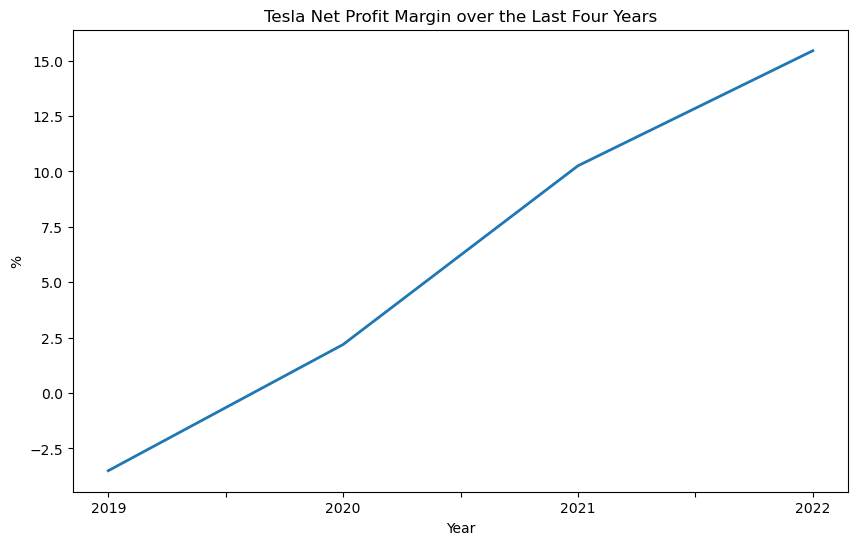

In [8]:
(data['netProfitMargin']*100).plot(lw=2.0,figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Tesla Net Profit Margin over the Last Four Years')
plt.show()

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 特斯拉2019-2022年的净利润率数据
data = {
    'Year': [2019, 2020, 2021, 2022],
    'Net Profit Margin': [-3.5072, 2.1880, 10.2540, 15.4465]
}

df = pd.DataFrame(data)

# 简单线性回归预测
X = np.array(df['Year']).reshape(-1, 1)
y = np.array(df['Net Profit Margin'])

model = LinearRegression()
model.fit(X, y)

# 预测2023年的净利润率
X_2023 = np.array([2023]).reshape(-1, 1)
y_2023_pred = model.predict(X_2023)

print(f"预测的2023年特斯拉净利润率：{y_2023_pred[0]:.4f}%")

预测的2023年特斯拉净利润率：22.3271%
